In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, ToktokTokenizer
import re
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
res = pd.read_csv(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\Restaurants_Train_v2.csv")

In [21]:
res['Sentence'].iloc[100]

'Great bagels, spreads and a good place to hang out in.'

In [7]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Assuming you have already read the CSV file and stored it in res
# If not, use the code from the previous response to read the CSV file

# Function to calculate the average word length in a sentence
def average_word_length(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    
    # Calculate the length of each word and sum them up
    total_word_length = sum(len(word) for word in words)
    
    # Count the total number of words
    total_words = len(words)
    
    return total_word_length, total_words

# Apply the average_word_length function to each sentence in the 'Sentence' column
res['Total_Word_Length'], res['Total_Words'] = zip(*res['Sentence'].apply(average_word_length))

# Calculate the total sum of word lengths and total number of words across all sentences
total_word_length_sum = res['Total_Word_Length'].sum()
total_words_sum = res['Total_Words'].sum()

# Calculate the average word length for the entire dataset
average_word_length_dataset = total_word_length_sum / total_words_sum

print("Average word length for the entire dataset:", average_word_length_dataset)


Average word length for the entire dataset: 3.987809153922917


In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Read the restaurant review dataset
#res = pd.read_csv(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\Restaurants_Train_v2.csv")

# Calculate Average Word Length
def average_word_length(sentence):
    words = word_tokenize(sentence)
    total_word_length = sum(len(word) for word in words)
    total_words = len(words)
    return total_word_length / total_words

res['Average_Word_Length'] = res['Sentence'].apply(average_word_length)

# Calculate Word Count
res['Word_Count'] = res['Sentence'].apply(lambda x: len(word_tokenize(x)))

# Calculate Sentence Count
res['Sentence_Count'] = res['Sentence'].apply(lambda x: len(sent_tokenize(x)))

# Tokenize words for word frequency analysis
all_words = word_tokenize(' '.join(res['Sentence']))

# Calculate Most Common Words
fdist = FreqDist(all_words)
most_common_words = fdist.most_common(10)

# Perform Sentiment Analysis
sid = SentimentIntensityAnalyzer()
res['Sentiment'] = res['polarity']
# Calculate Average Sentence Length
res['Average_Sentence_Length'] = res['Word_Count'] / res['Sentence_Count']


# Display the results
print("Average Word Length:", res['Average_Word_Length'].mean())
print("Most Common Words:", most_common_words)
print("Average Sentence Length:", res['Average_Sentence_Length'].mean())
print("Average Sentiment:", res['Sentiment'].mean())


Average Word Length: 4.007713801456025
Most Common Words: [('the', 3715), ('.', 3394), (',', 3386), ('and', 2823), ('a', 1588), ('is', 1316), ('to', 1176), ('was', 1079), ('of', 1055), ('The', 1004)]
Average Sentence Length: 19.943948009748173


TypeError: Could not convert negativepositivepositivepositiveneutralpositivepositivepositivepositiveneutralneutralpositivepositivenegativenegativenegativeneutralnegativeneutralneutralneutralneutralpositivepositivepositivepositiveneutralpositivenegativenegativeneutralpositivepositiveneutralpositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositiveconflictpositivepositiveneutralneutralneutralneutralpositivepositivepositivepositivepositiveneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivenegativenegativenegativepositivenegativepositivepositiveconflictneutralpositivepositiveneutralneutralpositivepositiveneutralpositivepositivenegativenegativepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivenegativenegativenegativeneutralnegativepositivenegativeconflictpositivepositivepositiveneutralnegativepositivepositivepositiveconflictpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositiveneutralnegativenegativenegativepositivepositivenegativepositivepositivenegativepositivepositiveneutralpositivepositivenegativepositiveconflictnegativenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositivenegativepositivepositivepositivenegativepositivepositivepositivepositiveconflictpositivenegativeneutralnegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativenegativepositiveneutralneutralnegativenegativeneutralpositivepositivenegativepositivenegativenegativenegativenegativenegativeneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivenegativepositivepositiveneutralpositivepositivenegativenegativeneutralneutralpositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeconflictnegativenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralneutralpositivepositivenegativeneutralpositivepositiveneutralneutralneutralnegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositiveconflictnegativenegativepositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositiveneutralnegativenegativeneutralpositivenegativepositivenegativenegativeneutralpositivepositiveneutralpositivenegativepositivenegativenegativenegativeneutralneutralneutralnegativenegativeneutralnegativeneutralneutralpositivepositivepositivenegativepositiveneutralneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativeneutralnegativepositivenegativenegativenegativeneutralnegativepositivepositivepositivepositivepositiveneutralconflictnegativeneutralnegativeneutralnegativepositivepositivepositivenegativenegativepositiveconflictpositivenegativenegativenegativepositiveconflictpositiveneutralneutralneutralnegativepositiveneutralnegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveneutralpositiveconflictpositivepositivepositivepositiveneutralneutralneutralneutralneutralneutralpositivenegativenegativeneutralpositivepositiveneutralpositiveneutralneutralnegativepositivepositivepositiveneutralpositivepositivepositivepositivepositiveconflictconflictnegativepositivenegativenegativenegativeneutralconflictpositivepositivenegativenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositiveconflictneutralpositivepositiveneutralnegativeneutralneutralneutralneutralpositivepositivepositivepositivepositivepositivenegativenegativenegativenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveconflictpositivepositivepositivepositivepositivepositivepositiveneutralneutralpositivenegativenegativepositivenegativeconflictpositivepositivepositiveneutralneutralneutralneutralpositivepositivenegativenegativenegativenegativeneutralnegativepositivepositivepositivenegativepositivepositivepositivepositivepositiveneutralneutralpositiveneutralneutralneutralpositivepositivepositivenegativepositivepositivepositivepositiveneutralnegativepositivepositivenegativenegativepositiveconflictpositivepositivepositivepositivepositivepositivenegativepositivepositivenegativeneutralpositivenegativenegativenegativepositivenegativepositivepositiveneutralpositivepositivepositivenegativepositivepositivepositivenegativenegativepositivepositivepositivenegativeneutralpositivepositivepositivepositiveneutralpositiveneutralneutralneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivenegativenegativenegativepositiveneutralpositiveneutralpositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositiveneutralpositivepositivepositivenegativenegativenegativepositiveneutralneutralpositivepositiveneutralpositivepositivepositivepositiveneutralneutralneutralneutralnegativeneutralpositivepositivepositivepositivepositivepositivenegativepositivenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveconflictpositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralconflictpositivepositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralpositivepositivepositivepositivenegativeneutralpositiveneutralnegativepositivepositivepositivepositivepositivepositiveconflictnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativenegativepositiveneutralneutralpositiveneutralpositivepositivenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivepositivepositiveconflictpositiveconflictneutralneutralpositivenegativenegativepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositiveconflictpositivepositivepositivepositivenegativeneutralpositivenegativenegativepositivepositivenegativepositivepositivepositivepositiveneutralnegativenegativeconflictnegativepositivepositiveneutralpositivepositivepositivepositivenegativeneutralnegativeneutralneutralpositivepositivepositivepositivenegativenegativenegativenegativenegativenegativepositivenegativepositiveneutralneutralpositivenegativenegativenegativepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositiveneutralpositivenegativeneutralneutralpositivenegativenegativepositivenegativeconflictnegativenegativenegativepositiveneutralpositivepositiveneutralneutralpositivenegativenegativenegativenegativenegativepositivepositivepositivepositiveneutralpositivepositivenegativenegativepositivepositivepositivepositiveneutralneutralpositivepositivepositivepositiveneutralnegativeneutralpositivepositiveneutralnegativeneutralpositivepositivenegativepositivepositivepositivenegativepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivenegativeneutralnegativepositivenegativenegativenegativenegativepositivepositivepositivepositivenegativeneutralneutralneutralpositivepositivepositivenegativenegativenegativeneutralnegativepositivepositivenegativenegativeneutralneutralneutralpositivepositivepositivepositivepositiveneutralnegativenegativenegativepositivenegativepositivepositivepositivenegativenegativenegativepositivepositivepositivepositiveneutralpositivepositivenegativeneutralnegativeneutralneutralpositiveneutralpositivenegativepositiveneutralneutralpositivepositivepositivepositiveneutralpositivepositivepositiveneutralneutralneutralpositivepositiveneutralpositivenegativeneutralpositivenegativepositivepositivepositivepositivepositiveneutralpositivenegativenegativenegativeneutralneutralpositivenegativenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativenegativenegativepositivepositiveneutralpositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralnegativeneutralpositivenegativenegativepositivenegativenegativenegativenegativepositivepositiveneutralneutralnegativenegativenegativenegativenegativenegativepositivepositivenegativepositivepositiveneutralnegativenegativepositivepositivepositivepositivepositivenegativenegativenegativenegativenegativepositivenegativepositivenegativepositivepositivepositiveneutralpositiveneutralpositivepositivenegativeneutralpositivepositivepositivepositivenegativenegativeneutralnegativeconflictpositiveneutralpositivepositivepositivepositiveneutralneutralpositivepositiveneutralneutralnegativenegativepositivepositivenegativeconflictnegativenegativepositivepositiveneutralpositivepositiveneutralnegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralnegativenegativeneutralneutralpositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativenegativeconflictneutralpositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativeneutralpositivepositiveneutralneutralneutralnegativepositivepositivepositivepositiveneutralnegativepositiveneutralnegativenegativeneutralnegativepositivepositivepositivepositivepositivepositiveneutralneutralnegativepositivepositivepositivepositivepositiveneutralnegativenegativenegativepositivepositivepositivepositivepositivenegativenegativeneutralpositivepositivepositiveneutralneutralpositiveneutralpositivepositivepositiveneutralneutralneutralpositiveneutralnegativeneutralpositivepositivenegativenegativepositiveneutralnegativenegativeconflictconflictconflictnegativeneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativenegativenegativepositivenegativeneutralpositivepositivepositivepositivenegativenegativeneutralpositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositiveneutralneutralnegativepositivenegativeneutralnegativepositivepositiveneutralneutralneutralnegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivenegativeneutralneutralneutralpositivenegativeneutralnegativepositivepositivepositivenegativenegativeneutralpositivenegativenegativenegativepositivepositivepositivenegativenegativenegativepositivepositivepositiveneutralnegativenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivenegativenegativepositivepositivepositivepositivepositivepositiveneutralneutralpositivenegativeneutralpositivenegativenegativenegativepositiveneutralpositiveconflictnegativepositivepositivepositivepositivepositivepositivepositiveneutralneutralpositivepositivepositivenegativeneutralnegativenegativepositivepositivepositivenegativeneutralnegativenegativepositivepositivenegativenegativepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositiveconflictpositivenegativepositivepositivepositivenegativeneutralneutralpositivepositivenegativeconflictpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativepositiveneutralneutralnegativenegativenegativeneutralpositiveneutralnegativeneutralpositivepositivepositiveconflictpositivepositiveneutralneutralpositivenegativeneutralneutralnegativenegativeneutralneutralneutralnegativepositivepositivepositivenegativenegativenegativepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositiveconflictneutralneutralnegativepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositiveneutralpositiveneutralconflictneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativenegativenegativenegativenegativepositivepositivepositivepositivepositivepositiveconflictnegativepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveconflictnegativenegativepositivepositiveconflictpositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativeneutralneutralneutralneutralpositivenegativenegativenegativenegativepositivepositivepositivepositivepositivepositivenegativeneutralnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivenegativenegativepositivepositiveconflictpositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositiveconflictnegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativeneutralnegativepositivepositivepositivenegativenegativeneutralpositivepositiveconflictpositivepositiveconflictnegativenegativenegativepositivenegativeneutralpositivepositivepositivepositiveneutralneutralpositivepositivepositivenegativenegativepositivepositivepositivenegativeneutralneutralpositivepositivenegativepositivepositiveneutralneutralnegativepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivenegativeneutralnegativeconflictpositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivenegativepositivenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativenegativenegativepositivenegativepositivepositivepositiveneutralnegativepositivenegativepositivepositivenegativeneutralpositivepositivepositivenegativenegativenegativeneutralneutralnegativenegativepositiveneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralpositivepositiveneutralneutralneutralneutralpositivepositivepositivepositivenegativenegativepositivepositivepositivepositiveneutralpositivepositivepositivenegativeneutralpositivenegativenegativenegativepositivepositiveneutralpositivenegativenegativenegativepositiveneutralneutralpositiveneutralneutralneutralneutralneutralpositivepositivepositiveneutralpositivenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositiveconflictpositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralneutralneutralneutralneutralpositivepositivepositiveconflictneutralnegativenegativenegativepositivepositivenegativeneutralpositiveneutralneutralneutralpositivepositivepositivepositivenegativenegativepositivepositiveneutralneutralconflictnegativepositivepositivepositivepositivepositivenegativeconflictneutralpositivenegativepositivenegativeneutralpositivepositivenegativenegativenegativenegativenegativeneutralpositiveconflictpositivepositivenegativepositiveneutralneutralpositiveneutralnegativenegativenegativepositivepositivepositivenegativenegativepositivepositivepositiveneutralneutralconflictneutralneutralneutralneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivenegativenegativenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivenegativenegativepositivepositivenegativepositivepositivenegativenegativeconflictpositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativeneutralneutralnegativeneutralneutralpositivenegativeneutralpositivepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivenegativepositivenegativeneutralnegativenegativenegativenegativenegativepositivepositivepositivenegativenegativenegativepositivepositiveneutralnegativenegativenegativenegativenegativeneutralneutralpositivenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralnegativepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositiveconflictneutralnegativepositivepositivenegativepositiveneutralneutralnegativeneutralnegativepositivepositiveconflictneutralpositivepositivepositivepositivepositivepositivepositivenegativenegativenegativenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivenegativenegativenegativeneutralnegativepositivepositivenegativenegativenegativepositiveconflictnegativepositivepositivepositivepositiveconflictpositivepositivenegativeconflictnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivenegativeneutralpositivenegativepositivepositivenegativepositivepositiveneutralneutralnegativeneutralnegativeneutralnegativepositivepositivepositiveneutralpositivepositivenegativenegativenegativenegativenegativeneutralnegativenegativenegativenegativeneutralnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativenegativepositivenegativeneutralneutralneutralpositivepositiveneutralneutralnegativeneutralpositivepositivenegativeneutralpositivepositivenegativepositivepositivepositivepositivenegativepositiveconflictpositivepositivepositiveneutralnegativepositivepositivepositivepositivepositiveneutralpositivepositivenegativeneutralnegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivenegativenegativepositivepositivepositivepositivenegativeneutralnegativenegativepositivepositiveneutralpositivenegativeneutralpositivenegativepositivenegativenegativenegativeneutralpositivepositivepositivenegativeneutralneutralpositivepositivepositivenegativenegativepositivepositivenegativeneutralpositiveneutralpositivepositivepositivepositivenegativepositivepositivepositivenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralpositivenegativepositivenegativenegativenegativenegativenegativenegativenegativepositivenegativenegativenegativepositivepositivepositivepositivenegativepositivepositivenegativenegativeneutralpositivepositivepositivepositivepositivenegativenegativenegativenegativepositivenegativenegativenegativeneutralneutralpositivepositivenegativenegativenegativeneutralneutralnegativeneutralnegativepositiveneutralpositivepositivenegativeneutralpositivepositivenegativenegativeneutralpositivenegativeconflictpositivenegativeneutralpositivepositivepositivepositivepositivenegativenegativenegativeneutralpositivepositivepositivepositivenegativeneutralpositivepositiveneutralpositivenegativeneutralpositiveneutralneutralnegativepositivepositivepositivepositivepositiveconflictneutralneutralneutralneutralpositivepositivenegativepositivepositivepositivepositiveneutralneutralneutralconflictnegativenegativenegativenegativenegativepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativenegativenegativenegativepositivepositivepositiveneutralnegativeneutralpositivepositivenegativepositivepositivepositivenegativepositivenegativenegativenegativepositivepositiveneutralpositivepositivepositivepositiveneutralnegativeconflictneutralpositivepositiveneutralpositiveneutralneutralneutralpositivepositiveneutralpositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivenegativenegativepositivepositivepositivenegativepositivepositivenegativenegativepositivepositivepositiveneutralneutralpositivenegativepositiveneutralpositivenegativepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositiveneutralneutralneutralneutralnegativepositiveconflictpositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivenegativeconflictpositivepositivepositivepositivenegativenegativenegativenegativepositivepositivepositivepositivepositivepositivenegativenegativeconflictpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivenegativepositivepositiveneutralpositivepositivepositiveneutralpositivepositivepositivenegativenegativepositivepositivepositiveneutralconflictpositivepositivenegativepositiveneutralpositivepositivepositivenegativepositivepositiveconflictnegativeneutralnegativenegativepositivepositivepositiveneutralpositivepositivepositivenegativeneutralpositivepositivepositivepositiveneutralpositiveneutralpositiveneutralpositivenegativepositivepositivenegativeneutralpositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositiveneutralneutralnegativeneutralneutralneutralpositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositiveconflictconflictconflictnegativeneutralpositivenegativenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralnegativenegativenegativeneutralpositivepositivepositivepositivenegativeneutralpositivepositivenegativenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivenegativenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativenegativeconflictconflictconflictpositiveneutralneutralpositivepositiveneutralpositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivepositiveneutralneutralnegativeneutralpositiveneutralpositiveneutralpositivepositivepositivepositivepositiveneutralneutralnegativepositivepositiveneutralneutralnegativepositivenegativenegativepositivepositivenegativeneutralneutralneutralnegativepositivenegativeneutralnegativenegativeneutralpositivepositivepositiveconflictpositivenegativeconflictconflictnegativeneutralneutralpositivenegativepositivepositiveneutralpositivenegativeneutralpositivepositivenegativepositivepositivepositiveneutralneutralpositivepositivepositivepositiveconflictnegativeneutralnegativenegativepositivepositiveneutralneutralpositivepositiveneutralpositiveneutralnegativenegativenegativepositivepositivepositiveneutralneutralpositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivenegativenegativepositiveneutralpositivepositiveneutralneutralneutralneutralneutralneutralneutralpositivenegativepositivenegativepositivepositivepositivepositivenegativepositivepositivepositiveneutralneutralneutralpositivepositivepositivepositivepositivepositivenegativenegativepositivenegativenegativeneutralpositiveconflictnegativenegativeneutralnegativenegativenegativenegativenegativepositivepositiveneutralconflictneutralneutralpositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralnegativeconflictnegativepositivenegativenegativepositivepositivepositiveconflictnegativepositivenegativeneutralneutralneutralneutralpositiveneutralpositivepositivepositivepositivenegativenegativenegativeconflictnegativepositivepositiveconflictpositivepositivepositiveneutralneutralneutralneutralpositivepositivenegativenegativepositivepositivepositivepositivepositivepositiveneutralnegativenegativepositivepositivepositivenegativepositivenegativepositivepositivepositivepositivenegativenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativeconflictnegativepositivepositiveneutralneutralnegativepositiveneutralneutralpositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivenegativenegativenegativenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositivepositiveneutralneutralpositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralpositivepositivepositiveconflictpositivenegativepositivepositiveconflictpositivenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositiveneutralneutralneutralpositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivenegativeneutralneutralnegativenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativenegativepositivenegativepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativenegativenegativeneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositiveneutralnegativepositivepositivepositivenegativenegativepositivepositivepositivepositivenegativeneutralpositivepositivepositivenegativepositivepositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralnegativepositivepositivepositivepositivepositiveneutralnegativenegativepositivepositiveneutralnegativepositivepositivenegativepositivepositivenegativenegativenegativeconflictpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveconflictnegativenegativenegativeneutralneutralneutralneutralneutralnegativenegativeneutralneutralneutralneutralneutralneutralpositiveneutralneutralneutralneutralneutralconflictnegativeneutralneutralneutralneutralnegativeneutralneutralneutralneutralneutralpositivepositiveneutralneutralpositivenegativeneutralnegativeneutralneutralnegativeneutralneutralpositiveneutralnegativeneutralneutralneutralneutralneutralneutralneutralpositivepositivepositivepositiveneutralneutralneutralneutralneutralneutral to numeric

In [12]:
# Assuming res is your DataFrame containing the restaurant review dataset
num_reviews = len(res)

print("Number of reviews in the dataset:", num_reviews)


Number of reviews in the dataset: 3693


In [15]:
neg = res[res['polarity'] == 'negative']
neu = res[res['polarity'] == 'neutral']
pos = res[res['polarity'] == 'positive']

In [18]:
print("Number of negative reviews:", len(neg))
print("Number of neutral reviews:", len(neu))
print("Number of positive reviews:", len(pos))

Number of negative reviews: 805
Number of neutral reviews: 633
Number of positive reviews: 2164


In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, ToktokTokenizer
import re
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
res = pd.read_csv(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\Restaurants_Train_v2.csv")
is_unique = ~res['id'].duplicated(keep='first')

# Use the boolean mask to filter the DataFrame
unique_rows = res[is_unique]
res['Aspect Term'] = res['Aspect Term'].str.lower()

s = unique_rows['Sentence']
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = word_tokenize
custom_spellchecker = SpellChecker()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



def preprocess_text(text):
    text = text.lower()
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    return text
s['clean_text'] = s.apply(preprocess_text)
data = s['clean_text']


C:\Users\jduto\AppData\Local\Temp\ipykernel_1880\2246472148.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)
C:\Users\jduto\AppData\Local\Temp\ipykernel_1880\2246472148.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)


In [2]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, ToktokTokenizer
import re
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
from spellchecker import SpellChecker
from sklearn.preprocessing import LabelEncoder

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
res = pd.read_csv(r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\Restaurants_Train_v2.csv")
is_unique = ~res['id'].duplicated(keep='first')

# Use the boolean mask to filter the DataFrame
unique_rows = res[is_unique]
res['Aspect Term'] = res['Aspect Term'].str.lower()

s = unique_rows['Sentence']
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
tokenizer = word_tokenize
custom_spellchecker = SpellChecker()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



def preprocess_text(text):
    text = text.lower()
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    return text
s['clean_text'] = s.apply(preprocess_text)
data = s['clean_text']

# Specify the file path where you want to save the text file
output_file_path = "data_ready.txt"

# Open the file in write mode and write each processed document on a new line
#with open(output_file_path, "w", encoding="utf-8") as output_file:
 #   for document in data:
  #      processed_text = " ".join(document)  # Join the words in the document list
  #      if processed_text.strip():  # Check if the processed text has content
   #         output_file.write(processed_text + "\n")  # Write the processed text to the file

#print("Data has been exported to", output_file_path)

# Open the file for writing
with open(output_file_path, 'w') as file:
    # Write each value from the 'Sentence' column to the file, one value per line
    for term in data:
        file.write(str(term) + '\n')


C:\Users\jduto\AppData\Local\Temp\ipykernel_1880\516484554.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)
C:\Users\jduto\AppData\Local\Temp\ipykernel_1880\516484554.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['clean_text'] = s.apply(preprocess_text)


In [3]:
len(unique_rows['Aspect Term'].unique())

773

In [4]:
with open(output_file_path, "w", encoding="utf-8") as output_file:
    for document in data:
        if document.strip():
            output_file.write(document + "\n")


In [5]:
# Load top words
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusBTM.topWords"
# Read the TXT file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t',header=None)  # Change '\t' to the actual delimiter used in your file

# Display the first few rows of the DataFrame
print(df.head())

                                                   0
0  staff horrible us completely fair redeeming fa...
1  salads lettuce add take home u great get worth...
2  dish last cheese ordered took two artisanal wo...
3  family last night dinner would rather ate spen...
4  feel menu exceptional uniformly kitchen proudl...


In [6]:
# Load top words
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusBTM.topWords"
# Read the TXT file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t',header=None)  # Change '\t' to the actual delimiter used in your file

# Display the first few rows of the DataFrame
print(df.head())

                                                   0
0  staff horrible us completely fair redeeming fa...
1  salads lettuce add take home u great get worth...
2  dish last cheese ordered took two artisanal wo...
3  family last night dinner would rather ate spen...
4  feel menu exceptional uniformly kitchen proudl...


In [7]:
# Load top words
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusBTM.topWords"
# Read the TXT file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t',header=None)  # Change '\t' to the actual delimiter used in your file

# Display the first few rows of the DataFrame
print(df.head())

                                                   0
0  staff horrible us completely fair redeeming fa...
1  salads lettuce add take home u great get worth...
2  dish last cheese ordered took two artisanal wo...
3  family last night dinner would rather ate spen...
4  feel menu exceptional uniformly kitchen proudl...


In [8]:
df[0].nunique()

466

In [126]:
# Specify the path to your text file
file_path = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusBTM.vocabulary"

# Open the file in read mode
with open(file_path, "r", encoding="utf-8") as file:
    file_contents = file.read()
dtt = r"C:\Users\jduto\OneDrive\Documents\Meesters\Coding\STTM-master\STTM-master\results\corpusBTM.theta"
with open(dtt, "r", encoding="utf-8") as file:
    theta_contents = file.readlines()
matrix = []

for element in theta_contents:
    # Split the element into individual values
    element_values = element.split()
    # Convert values to floats and append as a row to the matrix
    matrix.append([float(value) for value in element_values])

# Convert the matrix to a NumPy array for further manipulation if needed
matrix_array = np.array(matrix, dtype=float)




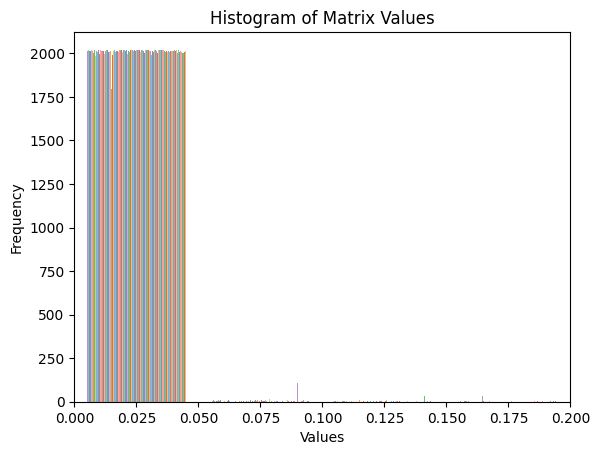

In [127]:
import matplotlib.pyplot as plt


# Create a histogram with 20 bins
plt.hist(matrix_array, bins=20, alpha=0.7)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Matrix Values')
plt.xlim(0, 0.2)  # Specify the x-axis limits (min, max)
#plt.ylim(0, 50)  # Specify the y-axis limits (min, max)

# Show the histogram
plt.show()

In [128]:
import numpy as np

# Assuming doc_topic_matrix is your document-to-topic matrix
# Each row represents a document, and each column represents a topic
# threshold is the value above which a topic is considered allocated to a document

def allocate_topics(doc_topic_matrix, threshold):
    allocated_topics = []

    for doc_id, doc_topics in enumerate(doc_topic_matrix):
        assigned_topics = [topic_id for topic_id, topic_prob in enumerate(doc_topics) if topic_prob > threshold]
        allocated_topics.append(assigned_topics)

    return allocated_topics


threshold = 0.01
allocated_topics = allocate_topics(matrix_array, threshold)




In [129]:
max(matrix_array[0])

0.31065218797986893

In [130]:
np.sum((matrix_array > 0.5))

1376

In [134]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define your stop words
stop_words = set(stopwords.words('english'))

def generate_one_word_summary_from_text(text):
    sentences = sent_tokenize(text)
    
    # Preprocess the sentences
    preprocessed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        tagged_words = pos_tag(words)  # Perform POS tagging
        nouns = [word for word, pos in tagged_words if pos.startswith('N')]  # Retain only nouns
        filtered_words = [word for word in nouns if word.isalnum() and word not in stop_words]
        preprocessed_sentences.append(filtered_words)
    
    # Calculate word frequencies
    word_frequencies = {}
    for sentence in preprocessed_sentences:
        for word in sentence:
            if word not in word_frequencies:
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    
    # Check if word_frequencies dictionary is empty
    if not word_frequencies:
        return None
    
    # Sort the word frequencies and select the most frequent word
    top_word = max(word_frequencies, key=word_frequencies.get)
    
    return top_word




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jduto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
def group_sentences_by_topics(sentence_topic_matrix, threshold):
    topic_sentence_mapping = {}

    for sentence_id, sentence_topics in enumerate(sentence_topic_matrix):
        assigned_topics = [topic_id for topic_id, topic_prob in enumerate(sentence_topics) if topic_prob > threshold]

        for topic_id in assigned_topics:
            if topic_id not in topic_sentence_mapping:
                topic_sentence_mapping[topic_id] = []
            topic_sentence_mapping[topic_id].append(sentence_id)

    return topic_sentence_mapping

threshold = 0.01
topic_sentence_mapping = group_sentences_by_topics(matrix_array, threshold)



In [136]:
import pandas as pd

# Create a dictionary to store occurrences of each ID along with sentences
id_occurrences = {}

# Iterate through the DataFrame
for index, row in res.iterrows():
    current_id = row['id']
    aspect_value = row['Aspect Term']
    sentence = row['Sentence']  # Assuming the column name is 'Sentence'

    # Check if the ID has occurred before
    if current_id in id_occurrences:
        # If it has occurred, append the aspect value and sentence to the list
        id_occurrences[current_id]['Aspect Values'].append(aspect_value)
        id_occurrences[current_id]['Sentences'].append(sentence)
    else:
        # If it's the first occurrence, create a new dictionary with the aspect value and sentence
        id_occurrences[current_id] = {'Aspect Values': [aspect_value], 'Sentences': [sentence]}

# Filter out IDs with only one occurrence
repeated_ids = {k: v for k, v in id_occurrences.items() if len(v['Aspect Values']) >= 1}

# Create a DataFrame with columns 'id', 'Aspect Values', and 'Sentences'
repeated_ids_df = pd.DataFrame([
    {'id': k, 'Sentences': ' '.join(v['Sentences']), 'Aspect Values': v['Aspect Values']}
    for k, v in repeated_ids.items()
])


In [137]:
len(res['id'].unique())

2021

In [138]:
# Function to get a one-word summary for each topic number
def get_topic_summaries(matrix_array, threshold):
    # Group sentences by topics
    topic_sentence_mapping = group_sentences_by_topics(matrix_array, threshold)
    
    # Initialize a dictionary to store topic summaries
    topic_summaries = {}

    # Iterate through each topic
    for topic_id, sentence_ids in topic_sentence_mapping.items():
        # Combine sentences into one text
        sentences = [repeated_ids_df['Sentences'].iloc[sentence_id] for sentence_id in sentence_ids]
        text = ". ".join(sentences)
        
        # Generate one-word summary for the topic
        summary = generate_one_word_summary_from_text(text)
        
        # Store the summary for the topic
        topic_summaries[topic_id] = summary
    
    return topic_summaries

# Set the threshold
threshold = 0.01

# Get topic summaries
topic_summaries = get_topic_summaries(matrix_array, threshold)



In [141]:
repeated_ids_df['allocated_topics'] = allocated_topics
# Assuming 'Assigned_Topics' is a column of lists
repeated_ids_df['topic_summaries'] = repeated_ids_df['allocated_topics'].apply(lambda topics: [topic_summaries[topic] for topic in topics])



In [142]:
check = pd.DataFrame()
check['id'] = repeated_ids_df['id']
check['Actual Aspect'] = repeated_ids_df['Aspect Values']
check['Aspect Pred'] = repeated_ids_df['topic_summaries']

check['Common Elements'] = check.apply(
    lambda row: list(set(row['Actual Aspect']).intersection(row['Aspect Pred'])),
    axis=1
)

check['Accuracy'] = check.apply(
    lambda row: len(set(row['Actual Aspect']).intersection(row['Aspect Pred'])) / len(set(row['Actual Aspect'])),
    axis=1
)


In [143]:
import pandas as pd

check = pd.DataFrame()
check['id'] = repeated_ids_df['id']
check['Sentence'] = repeated_ids_df['Sentences']
check['Actual Aspect'] = repeated_ids_df['Aspect Values']
check['Aspect Pred'] = repeated_ids_df['topic_summaries']

# Remove duplicate words in 'Aspect Pred' column
check['Aspect Pred'] = check['Aspect Pred'].apply(lambda x: list(set(x)))

check['Common Elements'] = check.apply(
    lambda row: list(set(row['Actual Aspect']).intersection(set(row['Aspect Pred']))),
    axis=1
)

check['Accuracy'] = check.apply(
    lambda row: len(set(row['Common Elements'])) / len(set(row['Actual Aspect'])),
    axis=1
)


In [144]:
total_accuracy = np.mean(check['Accuracy'])

print(total_accuracy)

0.38491435168822596


In [145]:
aspect_term_counts = check['Actual Aspect'].value_counts()

top_aspect_terms = aspect_term_counts.head(50).index.tolist()
# Filter the original DataFrame to include only rows with top aspect terms
test_filter = pd.DataFrame(check)
test_filter = check[check['Actual Aspect'].isin(top_aspect_terms)]
test_filter['Aspect Pred'] = check['Aspect Pred']

# Assuming 'true_labels' contains the true labels for the data
true_labels = test_filter['Actual Aspect']

# Assuming 'pred_df' contains the predicted topics for each sentence
pred_labels = test_filter['Aspect Pred'].astype(str)

total_accuracy = np.mean(test_filter['Accuracy'])

print(total_accuracy)

0.7076547231270358


C:\Users\jduto\AppData\Local\Temp\ipykernel_1880\1249566732.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filter['Aspect Pred'] = check['Aspect Pred']


In [148]:
unique_rows['Aspect Term']=unique_rows['Aspect Term'].apply(preprocess_text)

C:\Users\jduto\AppData\Local\Temp\ipykernel_1880\2151182464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_rows['Aspect Term']=unique_rows['Aspect Term'].apply(preprocess_text)


In [149]:
spect_term_counts = unique_rows['Aspect Term'].value_counts()
f = spect_term_counts.head(50).index.tolist()
test_filter = check[check['Actual Aspect'].isin(f)]

In [150]:
spect_term_counts

food             271
service          139
staff             45
pizza             41
place             37
                ... 
architecture       1
nigiri             1
chefs              1
capex              1
cheese sticks      1
Name: Aspect Term, Length: 715, dtype: int64

In [151]:
check['Common Elements_f'] = check.apply(
    lambda row: list(set(row['Actual Aspect']).intersection(f)),
    axis=1
)
# Create a boolean mask to check if 'Common Elements' is not empty
mask = check['Common Elements_f'].apply(len) > 0

# Use the boolean mask to filter the rows
filtered_rows = check[mask]

# Assuming 'true_labels' contains the true labels for the data
true_labels = filtered_rows['Actual Aspect']

# Assuming 'pred_df' contains the predicted topics for each sentence
pred_labels = filtered_rows['Aspect Pred'].astype(str)

total_accuracy = np.mean(filtered_rows['Accuracy'])

print(total_accuracy)

0.5595743528647243


In [153]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform lexicon-based sentiment analysis
def perform_sentiment_analysis(text):
    sentiment_score = sia.polarity_scores(text)
    compound_score = sentiment_score['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


check['sentiment pred lex'] = check['Sentence'].apply(perform_sentiment_analysis)